# <center>Part I - Prosper Loan Dataset Exploration</center>
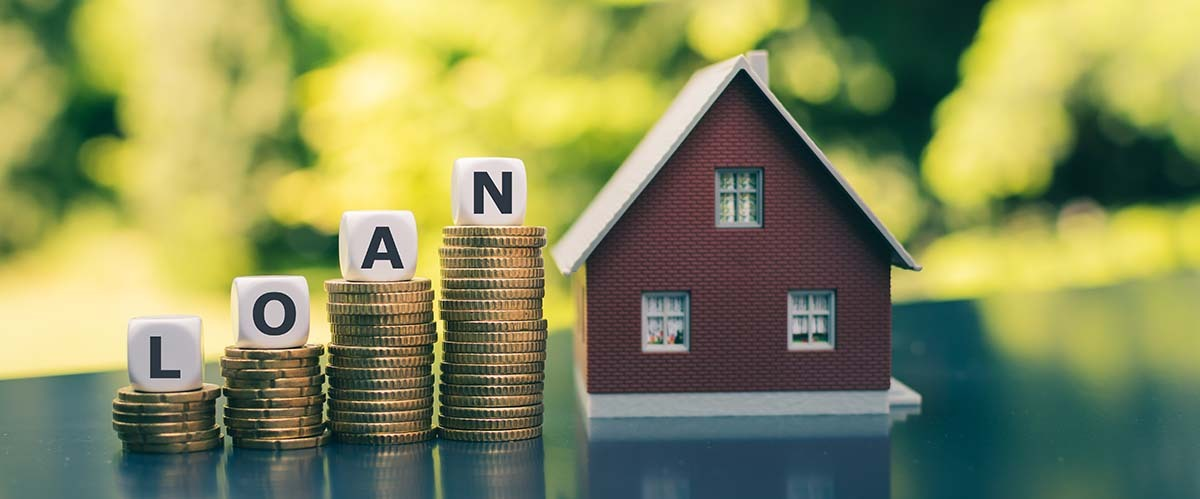
## <center> by Votes W. Wakoli</center>

## Table of Contents

1. [Introduction](#intro)
2. [Preliminary Wrangling](#pre)
3. [The structure of the dataset?](#structure)
4. [The main feature(s) of interest in your dataset](#features)
5. [Features in the dataset in supporting investigation into interest feature(s)](#interest)
6. [Univariate Exploration](#uni)
7. [Bivariate Exploration](#biv)
8. [Univariate Exploration](#mul)
9. [Conclusions](#conc)
10. [References](#ref)


## Introduction
<div id='intro' />
> - The ProsperLoadData was chosen as the basis in completing this Project III. The dataset comprises information on loans, i.e., 113,937 with different variables totaling 81. Based on the information, one can thus make summaries about the loans documented including original loan amounts, Percent Funded, Estimated Loss, Estimated Return, bowrrower rate and income. In completing the analysis, multiple python libraries are used with the adoption of seaborn as the main visualization package.


## Preliminary Wrangling
<div id='pre' />


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import io

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Based on Project II lessons, "request" library can be used to access and save the dataset as below
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
response = requests.get(url).content
df = pd.read_csv(io.StringIO(response.decode('utf-8')))

In [3]:
# Saving to csv file and reading the data
df.to_csv('prosperLoansDataset.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> - To answer below questions, doing preliminary assessment of the data is done
> - First, making a copy of the dataset for use

In [4]:
loan_data = df.copy()

In [5]:
# Using desribe to get descriptive statistics
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
# Using .shape to check rows and columns
loan_data.shape

(113937, 81)

In [7]:
# Uisng .info() method for better insights on the dataset's variables
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
# Summarizing all columns in the dataset
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [9]:
# Checking totals of each data type in the loan_data
loan_data.dtypes.value_counts()

float64    50
object     17
int64      11
bool        3
dtype: int64

### What is the structure of your dataset?
<div id='structure' />

> The ProsperLoanData contains 113,937 rows, i.e., loan information and 81 columns, i.e., specific variables representing additional loan information. Some of the variables in the dataset includes 'ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', among others. Based on .info() method, the loan dataset comprises different data types, i.e., float64 (50), int64 (11), object (17) and bool (3)

### What is/are the main feature(s) of interest in your dataset?
<div id='features' />

> I am interested in finding out contrbuting factors to getting loans. From the dataset, there are 113937 investors, i.e., rows of loans, and this are divided based on 81 variables. With this huge variable scope, it becomes useful to summarize the information and conclude which variables among the 81 have the most impact, have medium impact and those with least impact.

> One specific focus area is checking if Occupation varies across Borrower Rate, Original Loan Amount or EstmatedLoss and EstimatedReturn. Also, examining how 'IncomeRange' is associated with Loan Status, which contains 'Completed', "Defaulted" status and other elements like 'Cancelled'. Lastly, "LoanOriginalAmount" for the investors is of interest. This is core for planning purposes, especially for the financial institutions or banks providing loans to investors/clients.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


> The core features in the dataset are the main items in the columns. From the dataset, the focus will be on: 1. "LoanStatus"
> 2. "LoanOriginalAmount", > 3. "BorrowerRate", > 4. "Occupation", > 5. "IncomeRange", > 6. "EmploymentStatus", > 7. "EstimatedReturn", > 8. "EstimatedLoss"

## Univariate Exploration
<div id="uni" />

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Of all the 81 variables in the ProsperLoanData, the focus for this project are: 1. "LoanStatus" 2. "LoanOriginalAmount" 3. "BorrowerRate" 4. "Occupation" 5. "IncomeRange" 6. "EmploymentStatus" 7. "EstimatedReturn" and 8. EstimatedLoss"

In [10]:
# Isolating the selected variables only
focus_data = loan_data[['LoanStatus', 'LoanOriginalAmount', 'BorrowerRate', 'Occupation',
                      'IncomeRange', 'EmploymentStatus', 'EstimatedReturn', 'EstimatedLoss']]

In [11]:
# Overview of chosen variables
focus_data.sample(5)

,LoanStatus,LoanOriginalAmount,BorrowerRate,Occupation,IncomeRange,EmploymentStatus,EstimatedReturn,EstimatedLoss
70006,Current,4000,0.3177,Other,"$25,000-49,999",Other,0.1246,0.165
37668,Completed,4500,0.3199,Other,"$25,000-49,999",Employed,0.1487,0.147
57575,Current,3000,0.2958,Administrative Assistant,"$25,000-49,999",Employed,0.1257,0.147
53938,Completed,7000,0.1075,Analyst,"$50,000-74,999",Full-time,NaN,NaN
87916,Current,4537,0.3199,Computer Programmer,"$100,000+",Employed,0.1487,0.147


### Loan Status

### Question

> - How is the distribution in loan status across the different loan listings or borrowers?

#### Visualization

In [12]:
# Counts per each status for loans
focus_data.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

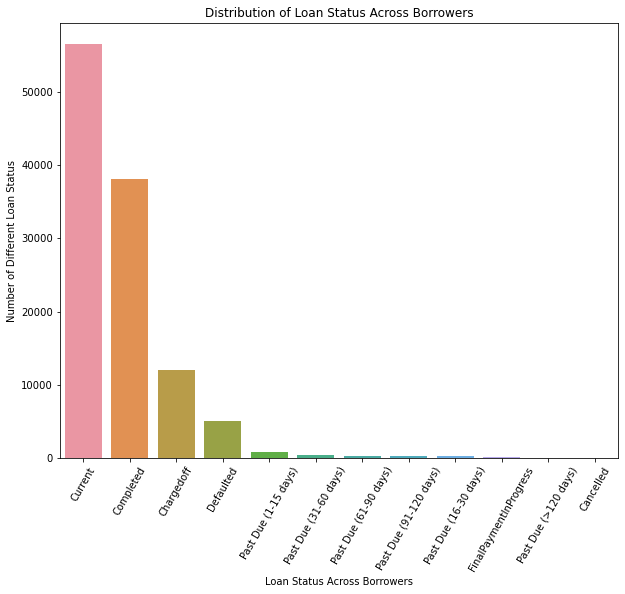

In [13]:
# Visualization
plt.figure(figsize = [10, 8])
sb.countplot(data = focus_data, x = 'LoanStatus', order = focus_data['LoanStatus'].value_counts().index )
plt.xlabel("Loan Status Across Borrowers")
plt.ylabel("Number of Different Loan Status")
plt.title("Distribution of Loan Status Across Borrowers")
plt.xticks(rotation = 60);

##### Making Some Tidiness Tasks

> - Rewriting "FinalPaymentInProgress" to "Final Payment in Progress" and "Chargedoff" to "Charged Off"

In [14]:
focus_data['LoanStatus'] = focus_data['LoanStatus'].replace('FinalPaymentInProgress', 'Final Payment In Progress')

In [15]:
focus_data['LoanStatus'] = focus_data['LoanStatus'].replace('Chargedoff', 'Charged Off')

- Combining All Past Due Values into One Column since they are all small in proportion

In [16]:
focus_data['LoanStatus'] = focus_data['LoanStatus'].replace(['Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)'],'Past Due Loans')

> - Re visualizing the Loan Statuses after making changes

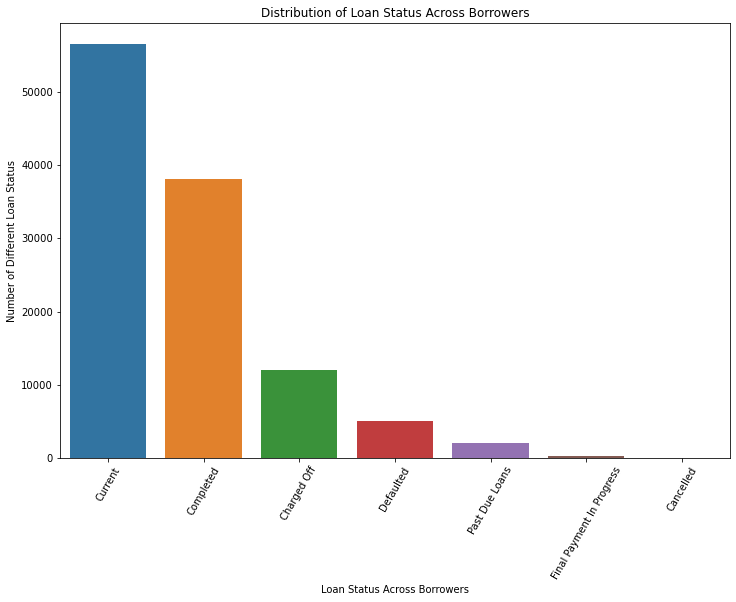

In [17]:
plt.figure(figsize = [12, 8])
sb.countplot(data = focus_data, x = 'LoanStatus', order = focus_data['LoanStatus'].value_counts().index )
plt.xlabel("Loan Status Across Borrowers")
plt.ylabel("Number of Different Loan Status")
plt.title("Distribution of Loan Status Across Borrowers")
plt.xticks(rotation = 60);

#### Observations

> - Of the examined LoanStatus, the majority of borrowers have 'Current' loan status (Current 56576), followed by Completed (38074) and then Charged off (11992)based on how tall the bars are in figure above. From the graph, there is also a noticeable proportional number of borrowers whose loans are Past Due
> - For the collected data, there is a lower Default proportion ( 5018), which can be seen as good for the financial institution

### LoanOriginalAmount

#### Question: 

> 1. What is the Distribution of Loan Original Amount Among Borrowers?
> 2. What are the highest and most common loan amounts accessed by the members?

#### Visualization

In [18]:
focus_data.LoanOriginalAmount.value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

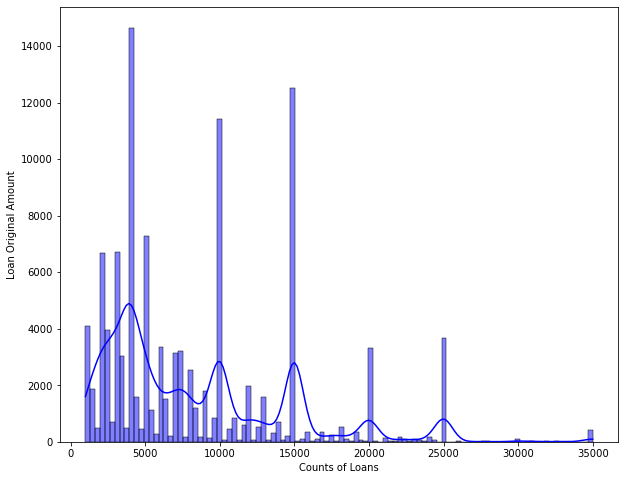

In [19]:
# LoanOriginalAmount is continuous data, and we can use histogram in representing the data
plt.figure(figsize = [10, 8])
sb.histplot(data = focus_data, x = 'LoanOriginalAmount', color = 'blue', kde = True)
plt.xlabel('Counts of Loans')
plt.ylabel('Loan Original Amount')
plt.show()

#### Observation

- The histogram shows **multiple peaks**, indicating no clear **normal distribution**
- Loan Original amount among borrowers is right-skewed, with most of the borrowers lying on the right
- However, there is no clear bell-shape in the dataset, indicating no normal distribution
- From the data, the most original amounts are 4000, 15000, 12407, 100000, 5000 and 2000.
- Based on the histogram, there are **multiple peaks** in the dataset

### BorrowerRate

#### Question

> 1. How is the distribution of BorrowerRate in the Loan Data?
> 2. What is the most utilized BorrowerRate across all loans in the ProsperLoanData?

#### Visualization

Text(0.5, 1.0, 'Histogram of Borrower Rate For Different Persons')

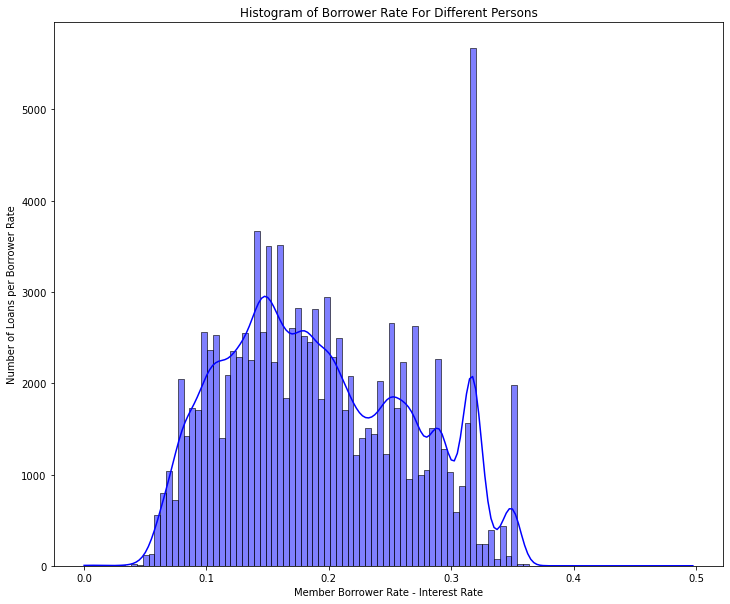

In [37]:
# BorrowerRate is also continuous data, and we can use histogram in representing the data
# plot size
plt.figure(figsize = [12, 10])
# visualization
sb.histplot(data = focus_data, x = 'BorrowerRate', color = 'blue', kde = True)
plt.xlabel('Member Borrower Rate - Interest Rate')
plt.ylabel('Number of Loans per Borrower Rate')
plt.title('Histogram of Borrower Rate For Different Persons')

#### Observations

- The BorrowerRate is Skewed to the right
- Overall, 0.15 as the largest rate, with most of the loans with highest counts had a BorrowerRate of between 0.1 to 0.2
- There is an evident **Outlier** in the dataset indicated by the highest rising bar in the histogram at around **0.35**
-  This is an outlier, as it highly differs from other BorrowerRates in the dataset, which seem to lie closer to each other
- The **least** proportions of loans fell in the range **0.4** to **0.5** as shown above

###  "Occupation"

#### Question

> - What are the top ten (10) and botton three (3) Occupations mostly using the loan facilities in the Prosper Loan Data?

#### Visualization

Text(0.5, 1.0, 'Distribution of Occupation Status Across Borrowers')

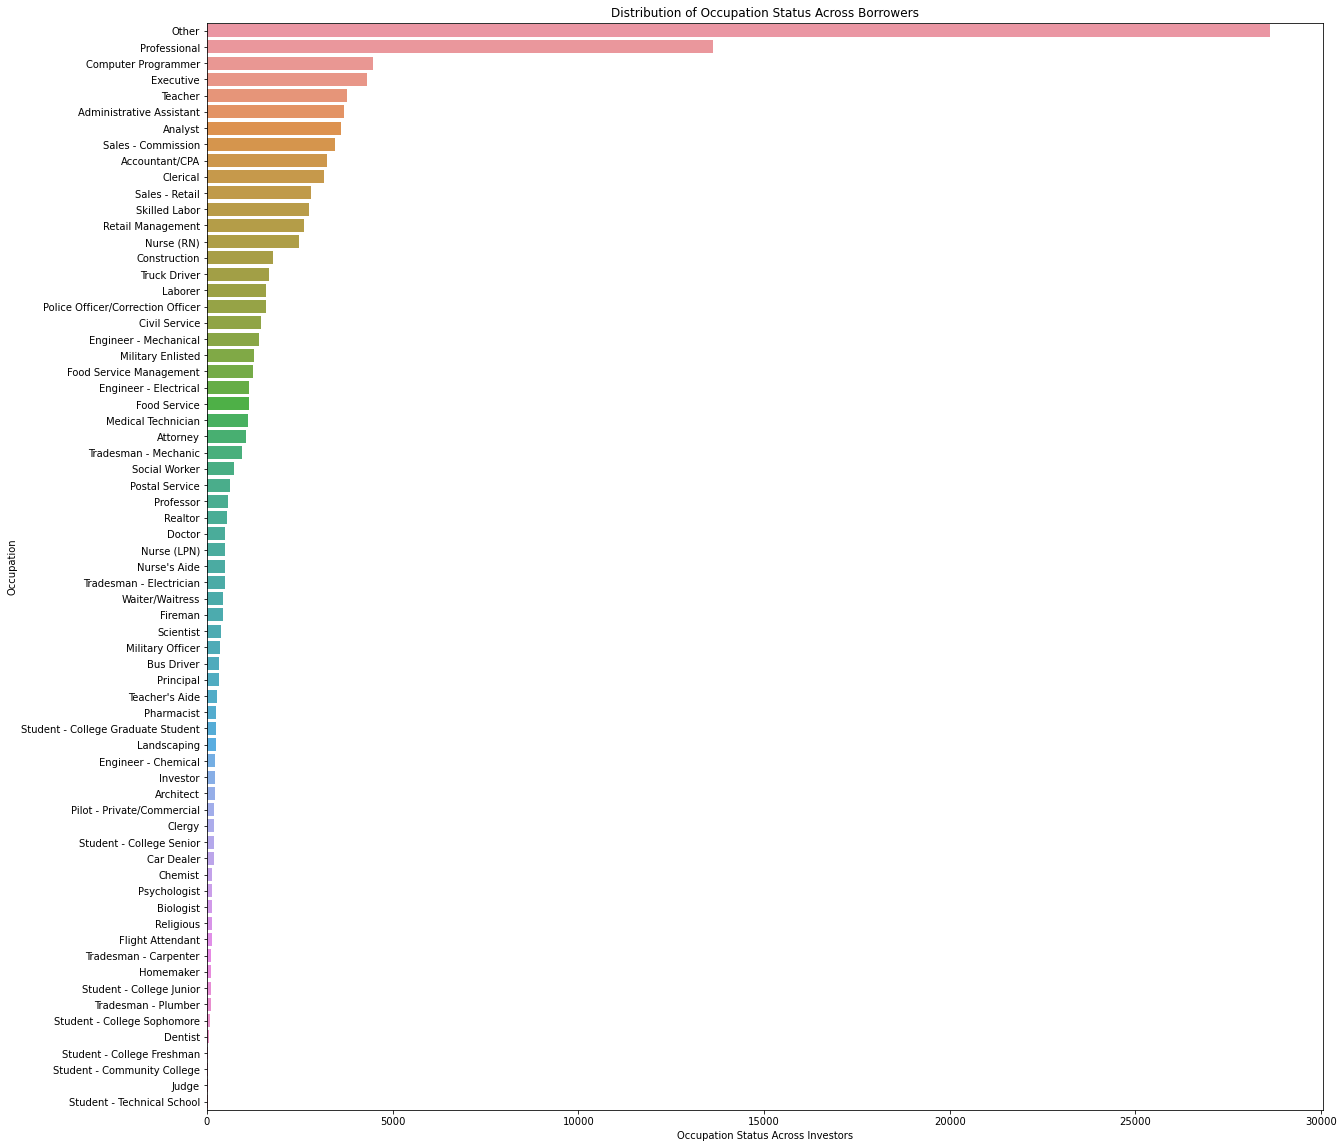

In [21]:
# Occupation is categorical and hence we can use bar chart
plt.figure(figsize = [20, 20])
sb.countplot(data = focus_data, y = 'Occupation', order = focus_data['Occupation'].value_counts().index )
plt.xlabel("Occupation Status Across Investors")
plt.title("Distribution of Occupation Status Across Borrowers")

#### Observations

- Apart from Other, which gives no clear Occupation type, the 10 most professionals in descending order are Porfessional, Computer Programmer, Executive, Teacher, Adminstration Assistant, Analyst, Sales - Commission, Accountant/CPA, Clerical, and Sales - Retail
- Moreover, of these ten occupations, the Professional group has a massive proportion compared to the next group of Computer Programmer
- Of all occupations, Judge and Student - Community College and Technical School are the least groups accessing Prosper Loans

### IncomeRange

#### Question

> - Which are the two (2) most Income Ranges Engaged in Accessing the Prosper Loans and how is the data distributed?

#### Visualization

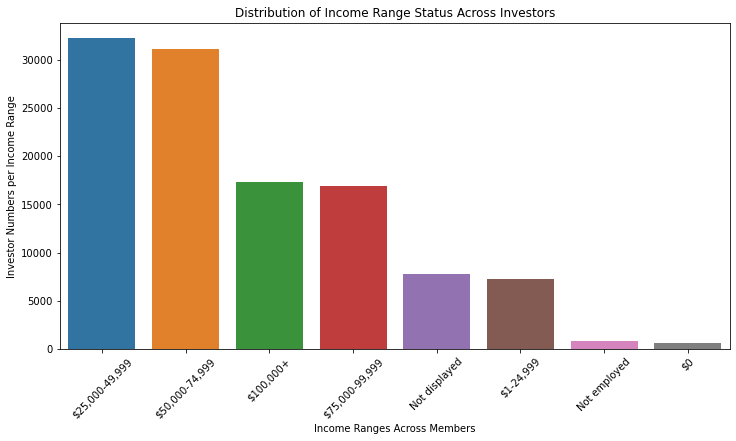

In [22]:
# Income Range is categorical and hence we can use bar chart
plt.figure(figsize = [12, 6])
sb.countplot(data = focus_data, x = 'IncomeRange', order = focus_data['IncomeRange'].value_counts().index )
plt.xlabel("Income Ranges Across Members")
plt.ylabel("Investor Numbers per Income Range")
plt.title("Distribution of Income Range Status Across Investors")
plt.xticks(rotation = 45);

#### Observation

- Most borrowers are in 25,000-49,999 totalling 32,192 members. However, this proportion is not too far from second group
- The second group lie in the 50,000-74,999 with 31050 and in third place 100,000+ with 17337

### EmploymentStatus

#### Question

> - Who are the most group using the Prosper Loan facility based on Employment Status?

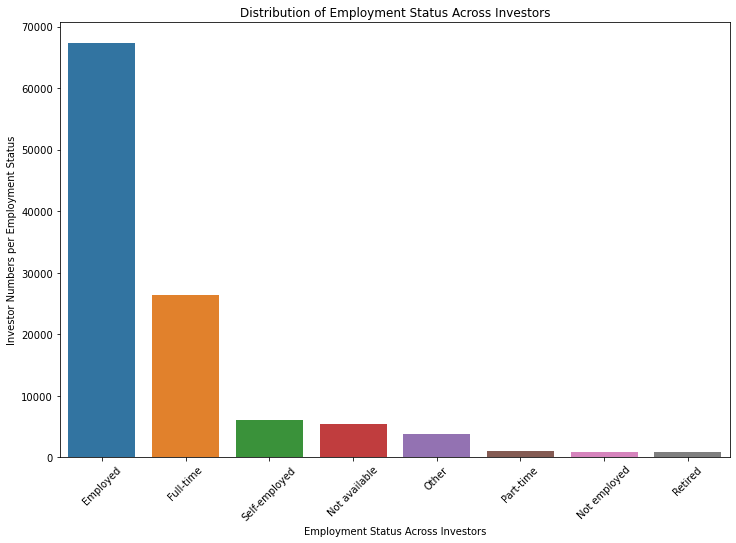

In [23]:
# EmploymentStatus is categorical and hence we can use bar chart
plt.figure(figsize = [12, 8])
sb.countplot(data = focus_data, x = 'EmploymentStatus', order = focus_data['EmploymentStatus'].value_counts().index )
plt.xlabel("Employment Status Across Investors")
plt.ylabel("Investor Numbers per Employment Status")
plt.title("Distribution of Employment Status Across Investors")
plt.xticks(rotation = 45);

#### Observations

- Most users are Employed, and this proportion is so big from the next group of Full time
- The proportion of Employed using the loans is more than 50% the next group of Full-Time
- Similarly, the other groups after Full-Time are in smaller proportion, numbers less then 50% of the Full-Time proportion
- Retired and Not Employed are the least groups utilizing the Prosper Loans

### EstimatedLoss

#### Question

> - How are the Estimated Loss for the loans distributed among the borrowers?

#### Visualization

Text(0.5, 1.0, 'Counts of Estimated Loss Across Different Loans')

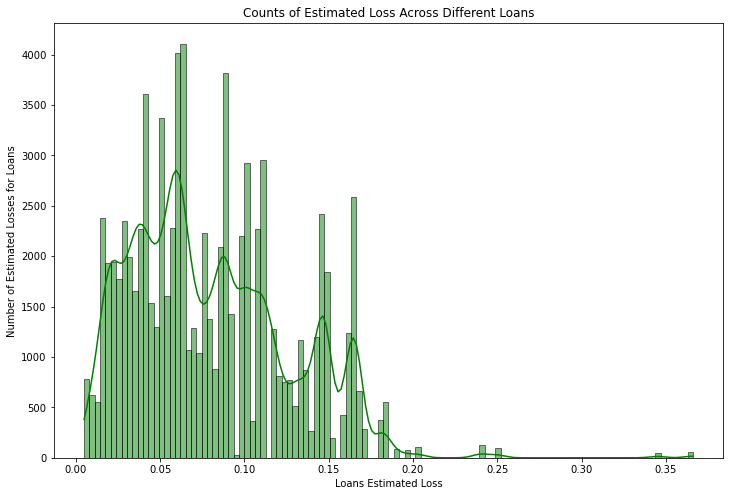

In [24]:
# EstimatedLoss is continuous data, and we can use histogram in representing the data
plt.figure(figsize = [12, 8])
sb.histplot(data = focus_data, x = 'EstimatedLoss', color ='green', kde = True)
plt.xlabel('Loans Estimated Loss')
plt.ylabel('Number of Estimated Losses for Loans')
plt.title('Counts of Estimated Loss Across Different Loans')

#### Observations

- The distribution is slightly normally distributed, and seem like it is right skewed
- Most of the EstimatedLoss values fall on the right of the histogram's peak
- Most of EstimatedLoss lies between 0.05 to 0.10, with the least between 0.25 to 0.35 at the histogram's right side

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Completed in Observations

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Tidying of data was done on these sections:
1. On Loan Status, 
    i. The 'FinalPaymentInProgress' was changed to 'Final Payment In Progress' for better readability
    ii. Also, on Loan Status 'Chargedoff' was changed to 'Charged off' for better readability
2. On Loan Status, upon plotting the first bar graphs, Past Due items were combined into one variable for better visualization

## Bivariate Exploration
<div id="biv" />

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Occupations and Income Range

#### Question

> - How does Income Range of members relate across their occupations in using ProsperLoans?

#### Visualizations

Text(0.5, 1.0, 'Distribution of Income Range Against Varied Occupations')

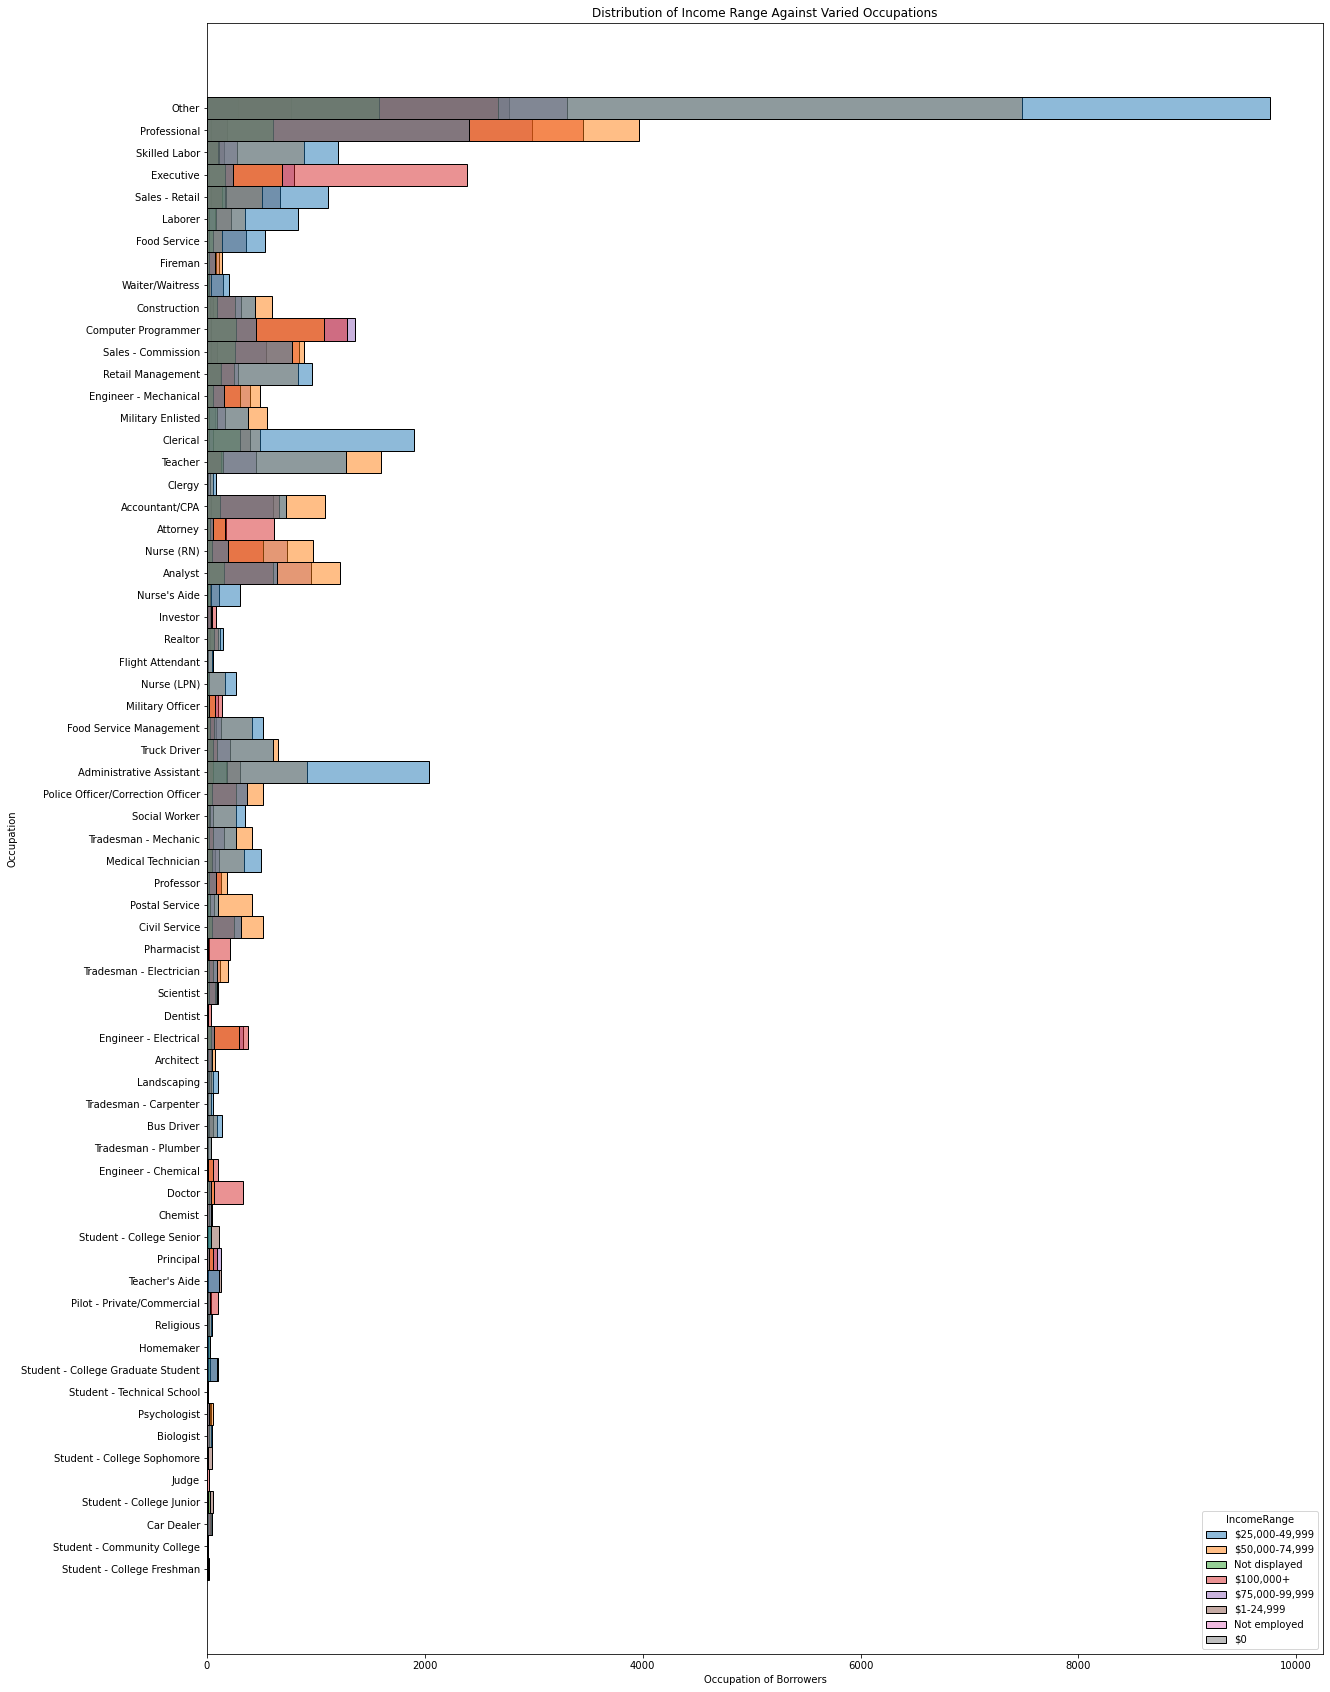

In [25]:
# Plotting IncomeRange and Occupation to group the variables for better insights
plt.figure(figsize = [20, 30])
sb.histplot(data = focus_data, y = 'Occupation', hue= 'IncomeRange')
plt.xlabel("Occupation of Borrowers")
plt.title("Distribution of Income Range Against Varied Occupations")

#### Observations

> - By comparing Occupation and Income Range, the most noticeable aspect is that among Other group, the most Income Range is 75000 - 99,000
> - The next noticeable most value is in Executive for which most members earn 100,000+ income as the most recognizable

### Employment Status and Loan Status

#### Question

> In EmploymentStatus vs Loan Status, which groupings have the most impact across the member's loans?

#### Visualization

Text(0.5, 1.0, 'Comparison of Loan Status Across Different Employment Status')

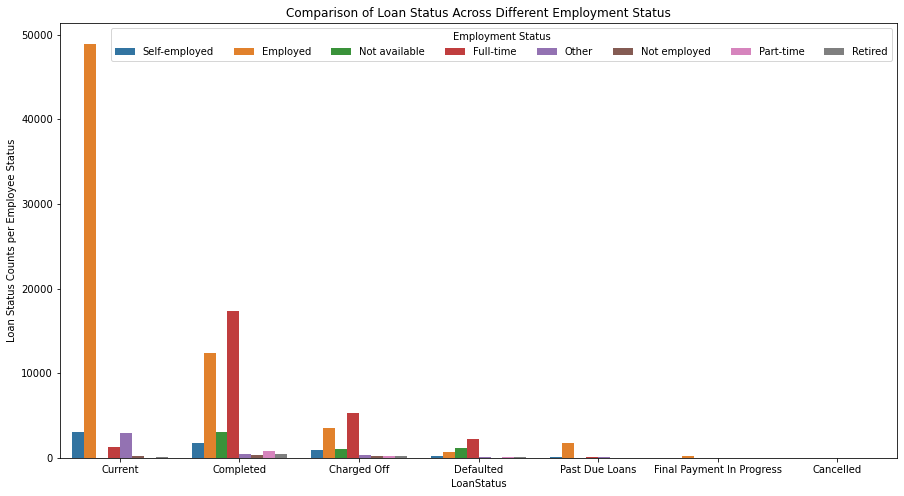

In [26]:
plt.figure(figsize = [15, 8])
sb.countplot(data = focus_data, x = 'LoanStatus', hue= 'EmploymentStatus', order = focus_data['LoanStatus'].value_counts().index)
plt.xlabel('LoanStatus')
plt.legend(loc = 1, ncol = 8, title = 'Employment Status')
plt.ylabel('Loan Status Counts per Employee Status')
plt.title('Comparison of Loan Status Across Different Employment Status')

#### Observations

> - The most impactful grouping in the dataset is the current, which has the bar with the highest peak for Employed
> - The Employed group has the most current loan status, with other groupings in the same category with very minute levels
> - In the Completed status, those with Full-time have the highest bar, thus making the most contribution in this group
> - The same impact is seen in Charged Off, and Defaulted who also have the highest level among the Full-Time members.

### Loan Status and Original Loan Amount

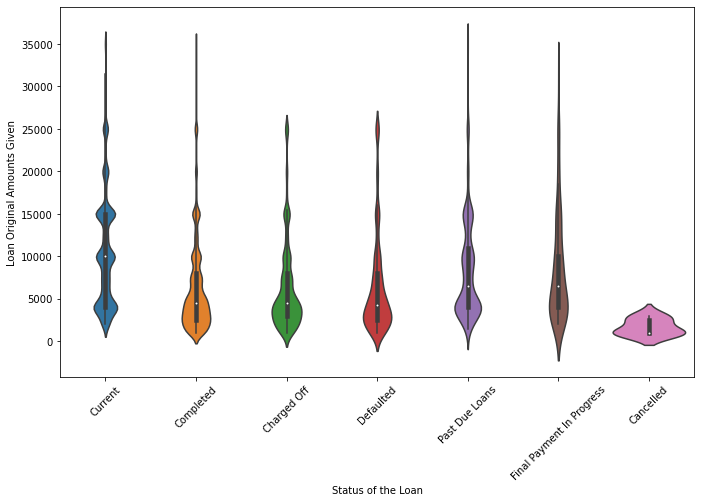

In [27]:
# Here, using violin plots in displaying the distribution across the variables
# defining the plot sizes
plt.figure(figsize = [25, 15])
plt.subplot(2, 2, 2)
sb.violinplot(data = focus_data, x = 'LoanStatus', y = 'LoanOriginalAmount', order = focus_data['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Loan Original Amounts Given');

- The different Past Dues were combined into one single column in data wrangling for better clarity

#### Observation

> - Based on the median points (white dot in the violin), Status of Loan has noticeable association with Loan Original Amount
> - From the medians, Current has the highest median on Loan Status, followed by Past Due
> - Completed, Charge off, and Defaulted have average levels in Original Loan Amounts
> - Since the thick bars in the center represents the interquartile range, most of the points lie on the right
> - This means most of the distribution is right skewed, as most points are on the right

### Loan Status and BorrowRate

#### Question

> - Is there is relationship between Loan Status and BorrowerRate>

Text(0, 0.5, 'Interest Rate')

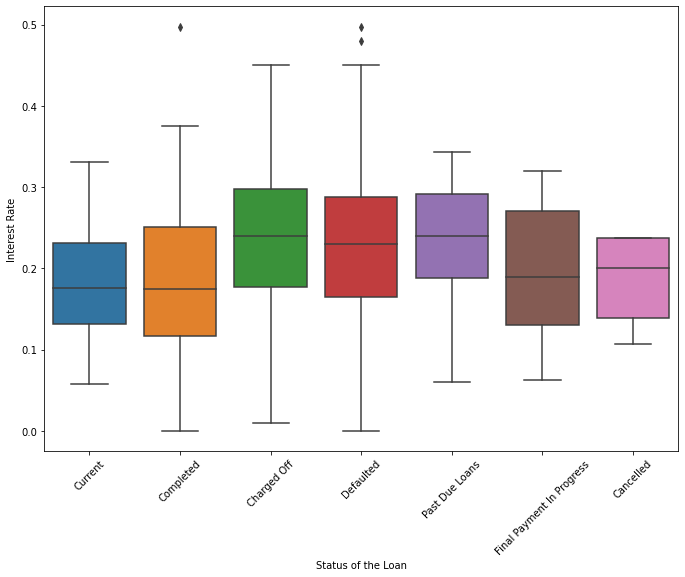

In [28]:
# Using boxplot in plotting BorrowerRate vs. Loan Status for subsequent explanations
plt.figure(figsize = [25, 18])

plt.subplot(2, 2, 1)
sb.boxplot(data = focus_data, x = 'LoanStatus', y = 'BorrowerRate', order = focus_data['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Interest Rate')

#### Observation

- From the box plots, one can see a relationship between Loan Status and Interest Rates
- Based on median line on the box plots, Charged Off, Defaulted and Past Due loans have the highest BorrowerRate
- Current, Completed, Final Payment in Progres and Cancelled have noticeably lesser Rates than the above variables
- There are **Outliers** in the **Completed** and the **Defaulted*** loan status, shown by the outside dots in **box plots**

## Multivariate Exploration
<div id="mul" />

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Pairplot in Examining Outlook Across All the Eight (8) Variables

#### Question

> - Is there any noticeable relationship across all the eight (8) variables of interest?

#### Visualization

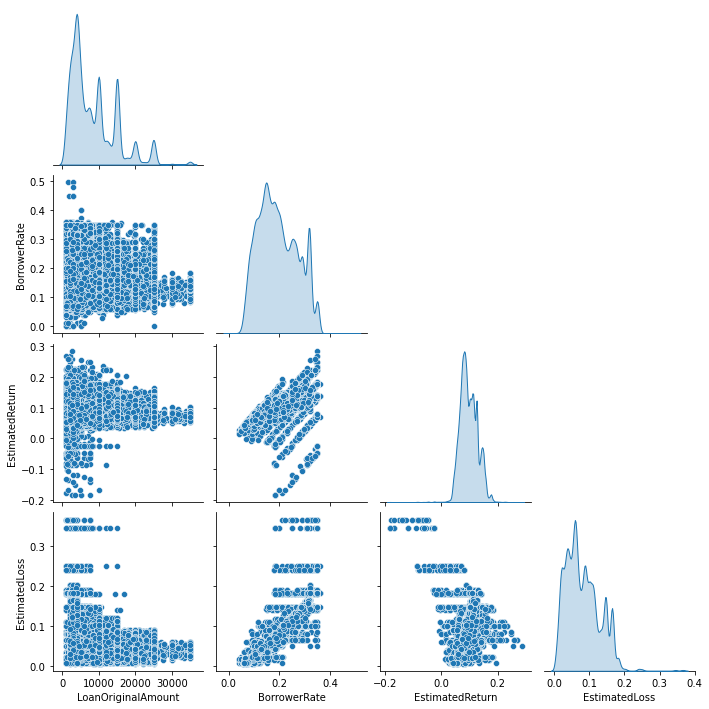

In [29]:
sb.pairplot(focus_data[['LoanStatus', 'LoanOriginalAmount', 'BorrowerRate', 'Occupation',
                      'IncomeRange', 'EmploymentStatus', 'EstimatedReturn', 'EstimatedLoss']], diag_kind ='kde', corner= True);

#### Observations

> - In creating the pair plot based on Loan Status, it can be seen that for the members, some variables have clear association
> - For BorrowerRate and EstimatedLoss and EstimatedReturn, the scatter plots shows positively association
> - Rising BorrowerRate is positively associated/correlated to EstimatedLoss and EstimatedReturn
> - For EstimatedLoss and EstimatedReturn, the correlation is negative, based on the scatter plots

### Examining Outlook Across All the Eight (8) Variables Relative to "LoanStatus"

#### Question

> - How does LoanStatus impact on all the eight (8) variables of interest?

#### Visualization

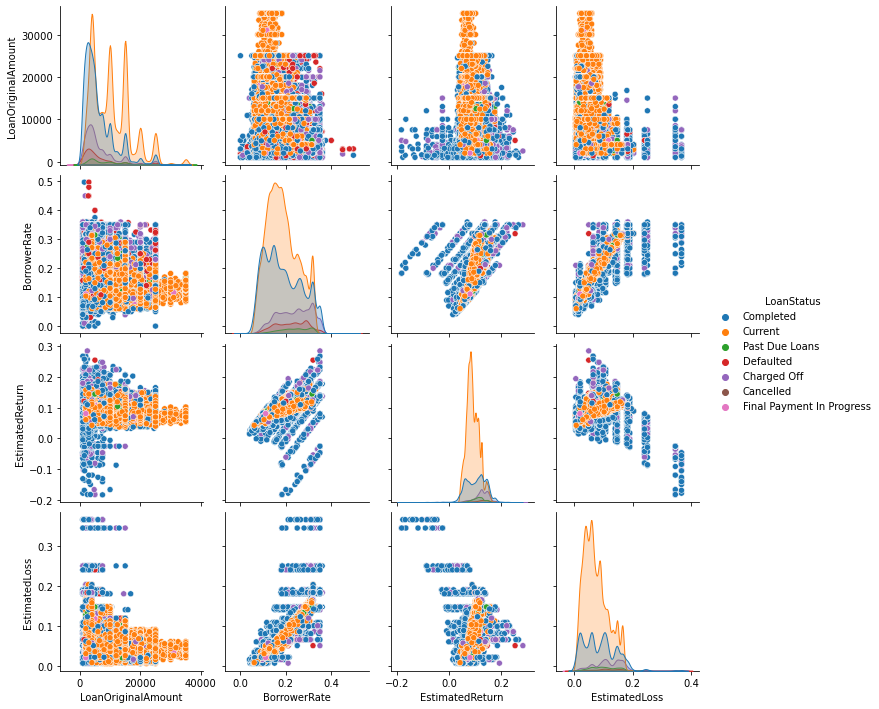

In [30]:
# The 'hue' element was added in examining the interest variables based on 'LoanStatus'
sb.pairplot(focus_data[['LoanStatus', 'LoanOriginalAmount', 'BorrowerRate', 'Occupation',
                      'IncomeRange', 'EmploymentStatus', 'EstimatedReturn', 'EstimatedLoss']], hue = 'LoanStatus');

#### Observation

> - In creating the pair plot based on Loan Status, it can be seen that for the members, impact varies based on scatter plots
> - Current LoanStatus has the most impact on EstimatedLoss, EstimatedReturn, BorrowRate and LoanOriginalAmount
> - Across Loan Status, BorrowerRate, EstimatedReturn, and EstimatedLoss have a positive correlation

### Correlation Between Continuous Variables

#### Question

> - Are there insights across the quantiative variables selected for examination in the dataset?

#### Visulaiization

> In making the exploration, five variables are chosen, with the adoption of a heatmap() for visualization. 
> - These are: 
> 1. 'LoanOriginalAmount',
> 2. 'BorrowerRate',
> 3. 'EstimatedReturn', & 
> 4. 'EstimatedLoss'

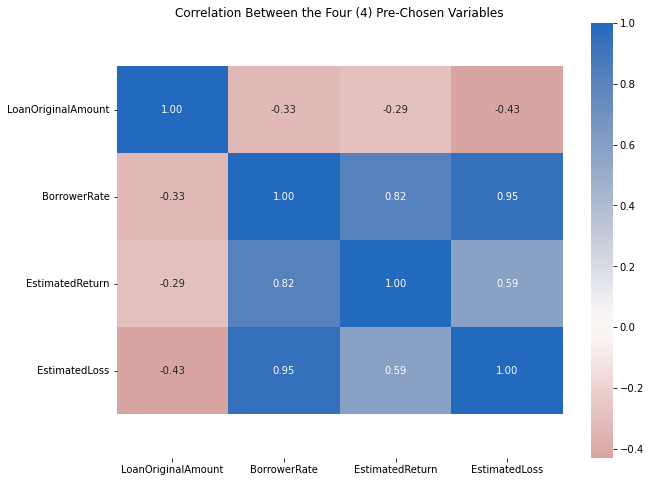

In [32]:
# In checking association, adopting correlation is used in this section
# Correlation technique is used in this case
# First, defining the dataset
correlation_data = loan_data[['LoanOriginalAmount', 'BorrowerRate', 'Occupation', 'EstimatedReturn', 'EstimatedLoss']]

# Setting the plot's size 
plt.figure(figsize = [10, 8])
# Visualization and reporting results to 2 decimal places
sb.heatmap(correlation_data.corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Between the Four (4) Pre-Chosen Variables')
bottom, top = plt.ylim() 
bottom += 0.5 
top -= 0.5
plt.ylim(bottom, top)
plt.yticks(rotation=0);
plt.show()

#### Observation

> - Of the 5 variables, LoanOriginalAmount has negative correlation with BorrowerRate (-0.33), EstimatedLoss (- 0.43), EstimatedReturn (-0.29)
> - BorrowerRate has positive correlation with EstimatedLoss (0.95), EstimatedReturn (0.82), and negative for LoanOriginalAmount (-0.33)

### Saving The Cleaned Dataframe to a CSV file: This will be used in Explanatory Presentation

In [33]:
# Name: slide_data
focus_data.to_csv("slide_data.csv")

## Conclusions
<div id="conc" />

> The exploration focuses on Prosper Loan Data comprising 81 columns and 113,937 rows. Of the diverse variables, this exploration focused on eight (8) variables, i.e., LoanStatus", "LoanOriginalAmount", "BorrowerRate", "Occupation", "IncomeRange", "EmploymentStatus", "EstimatedReturn" and EstimatedLoss". On loan status, current and completed were the two most occurences, with cancelled as the least. Secondly, on Loan Original amount, the distribution was somehow normal despite skewness in the dataset, with most amount being 4000, 15000 and 100000 for borrowers. The borrower rate (interest) rate was normally distributed with the most used rate being between 0.1 to 0.2. Top profession were Professional and computer programmer and executive. The multivariate analysis showed positive association across the variables, including Income Range and Loan status based on boxplots. Also, by checking correlation across quantitative variables (numeric), there were differences in correlation coefficient. Of the 5 variables, LoanOriginalAmount has negative correlation with BorrowerRate (-0.33), EstimatedLoss (-0.43), EstimatedReturn (-0.29). BorrowerRate has positive correlation with EstimatedLoss (0.95), EstimatedReturn (0.82), and negative for LoanOriginalAmount (-0.33)

## References
<div id="ref" />
> - ALX-Udacity classroom videos and Notes. https://classroom.udacity.com/nanodegree
> - Seaborn (202). seaborn: statistical data visualization. https://seaborn.pydata.org/index.html
